In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data import read_preprocessed_data, remove_outliers, outliers_statistics

df = read_preprocessed_data()

c:\dadada4\Mad\New folder\customer-profile-analysis\data/marketing_campaign.csv
<bound method NDFrame.head of       Education  Marital_Status    Income  Kidhome  Teenhome   Recency  \
0             0               0  0.234063        0         0  0.310532   
1             0               0 -0.234559        1         1 -0.380509   
2             0               1  0.769478        0         0 -0.795134   
3             0               1 -1.017239        1         0 -0.795134   
4             1               1  0.240221        1         0  1.554407   
...         ...             ...       ...      ...       ...       ...   
2235          0               1  0.356642        0         1 -0.104093   
2236          1               1  0.467539        2         1  0.241428   
2237          0               0  0.188091        0         0  1.450751   
2238          1               1  0.675388        0         1 -1.417072   
2239          1               1  0.024705        1         1 -0.311405   

 

In [2]:
outliers_statistics(df).head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent
Ilość wartości skrajnych,0.0,0.0,8.00000,0.0,0.0,0.0,35.000000,246.000000,174.00000,222.000000,...,8.00000,163.000000,164.000000,162.000000,142.000000,30.000000,21.000000,333.000000,3.000000,3.000000
Procent wartości skrajnych,0.0,0.0,0.00361,0.0,0.0,0.0,0.015794,0.111011,0.07852,0.100181,...,0.00361,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,0.001354,0.001354


In [3]:

incl= ['mean','std']
stat_cols = [col for col in df.columns if df[col].nunique()>9]
print(stat_cols)
for col in df.columns:
    if(col not in stat_cols):
        print(col)



['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Spent']
Education
Marital_Status
Kidhome
Teenhome
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response


In [4]:
num_cols = pd.DataFrame(df,columns= stat_cols)#df.select_dtypes(include=['int', 'float'])
statystyki = {
'Średnia':num_cols.mean(),
'Mediana':num_cols.median(),
'Minimum':num_cols.min(),
'Maksimum':num_cols.max(),
'Odchylenie Standardowe':num_cols.std(),
'Skośność':num_cols.skew()
}
#statystyki = pd.DataFrame(statystyki).transpose()

In [5]:

other_cols = [col for col in df.columns if col not in stat_cols]

print(other_cols)

['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


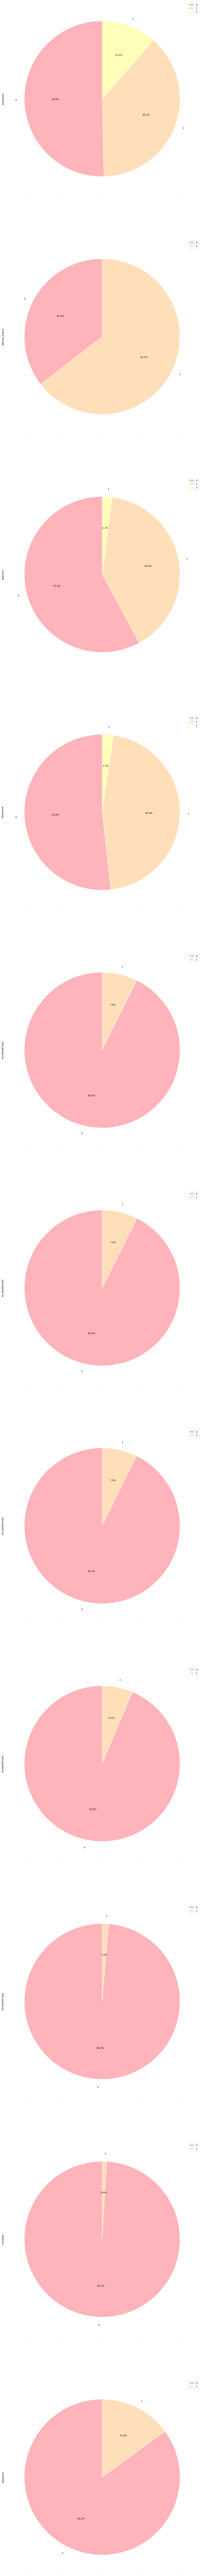

In [6]:
color_pallette = [
    '#FFB3BA',  # Pastel Pink  
    '#FFDFBA',  # Pastel Orange  
    '#FFFFBA',  # Pastel Yellow  
    '#BAFFC9',  # Pastel Green  
    '#BAE1FF',  # Pastel Blue  
    '#D4A5FF',  # Pastel Purple  
    '#FFC3A0',  # Pastel Peach  
    '#A0E8FF',  # Pastel Sky Blue  
    '#B5EAD7',  # Pastel Mint  
    '#F8C8DC',  # Pastel Rose  
]


ax = (
    df[other_cols]
    .astype(str)
    .apply(lambda x: x.value_counts())
    .plot(
        kind="pie",
        subplots=True,
        figsize=(15, 200),
        #the charts have to be so large and split apart because otherwise some percentages and/or legends overlap
        layout=(11,1),
        colors=color_pallette,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
    )
)




 



#plt.tight_layout()
plt.show()

In [7]:
statystyki = pd.DataFrame(statystyki).transpose()

statystyki.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent
Średnia,5.210433e-17,-2.404815e-18,-3.366741e-17,-7.214446e-18,-5.771557e-17,-2.164334e-17,-1.122247e-17,-1.442889e-17,-6.733483e-17,-9.619261e-17,-8.016051e-17,7.595208e-17,-5.771557e-17,8.196412e-17,1.442889e-17
Mediana,-3.439972e-02,-4.365786e-04,-3.872229e-01,-4.613818e-01,-4.414876e-01,-4.683552e-01,-4.634095e-01,-3.757501e-01,-1.682312e-01,-3.112352e-02,-2.293274e-01,-2.464554e-01,2.808287e-01,-9.844093e-02,-3.493494e-01
Minimum,-2.007250e+00,-1.693488e+00,-9.046404e-01,-6.624630e-01,-7.447440e-01,-6.875744e-01,-6.582331e-01,-8.486891e-01,-1.208121e+00,-1.490800e+00,-9.128373e-01,-1.784893e+00,-2.193591e+00,-2.268209e+00,-9.988568e-01
Maksimum,2.441328e+01,1.727167e+00,3.522319e+00,4.339430e+00,6.948158e+00,4.043907e+00,5.722241e+00,5.347777e+00,6.591050e+00,8.362018e+00,8.656301e+00,2.215044e+00,6.054474e+00,6.327410e+00,3.181881e+00
Odchylenie Standardowe,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
